In [1]:
import warnings
warnings.filterwarnings("ignore")

(ne_features)=
# 🌵 NaturalEarth features
<br>

EOmaps provides access to a large amount of basic map features provided by [NaturalEarth](https://www.naturalearthdata.com/) via [`Maps.add_feature`](eomaps.Maps.add_feature).

:::{note}
The first time a feature is added to a map, the corresponding dataset is downloaded and stored locally for subsequent use.
:::

:::{dropdown} <small>Where is the data stored?</small>
EOmaps uses `cartopy's` API to download and cache the features.
Run the following lines to get the used data-cache directory:

```python
from cartopy import config
print(config["data_dir"])
```
:::


## Preset Features
For the most commonly used features, style-presets are available:

```{eval-rst}
.. currentmodule:: eomaps.eomaps.Maps

.. autosummary::
    :nosignatures:

    add_feature.preset.coastline
    add_feature.preset.ocean
    add_feature.preset.land
    add_feature.preset.countries
    add_feature.preset.urban_areas
    add_feature.preset.lakes
    add_feature.preset.rivers_lake_centerlines

```

To add individual preset features (and optionally override style properties), use:
```python
m.add_feature.preset.<FEATURE-NAME>(**STYLE-KWARGS)
```

:::{tip}
The native projection of the provided feature shapes is `epsg 4326` (e.g. PlateCarree or lon/lat projection).  
If you create a map in a different projection, the features have to be re-projected which might take some time.  
Re-projected features are cached until the kernel is restarted, so creating the same figure again will be much faster!
:::

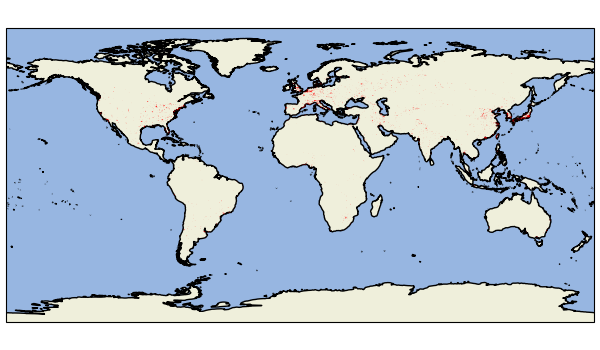

In [2]:
from eomaps import Maps
m = Maps(facecolor="none", figsize=(6, 3.5))
m.add_feature.preset.coastline()
m.add_feature.preset.land()
m.add_feature.preset.ocean()
m.add_feature.preset.urban_areas()
m.show()

You can override the feature-styles of the presets to quickly adjust the look of a map!

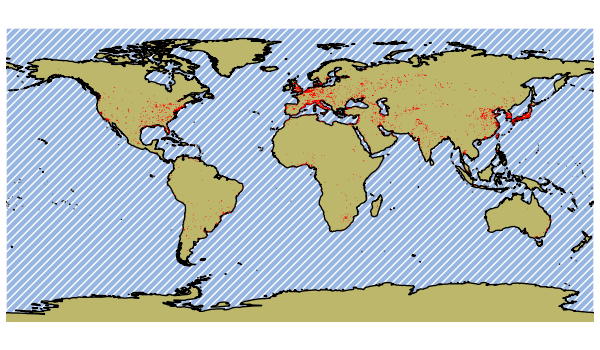

In [3]:
from eomaps import Maps
m = Maps(facecolor="none", figsize=(6, 3.5))
m.set_frame(ec="none")
m.add_feature.preset.coastline()
m.add_feature.preset.land(fc="darkkhaki")
m.add_feature.preset.ocean(hatch="////", ec="w")
m.add_feature.preset.urban_areas(ec="r", lw=0.25)
m.show()

:::{tip}
It is also possible to add multiple features in one go with:  
(In this case, the provided style arguments are applied to **all** added features!)
```python
m.add_feature.preset(*FEATURE-NAMES, **STYLE-KWARGS)
```
:::

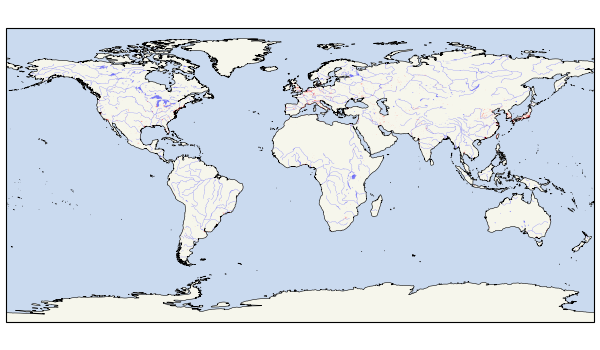

In [4]:
from eomaps import Maps
m = Maps(facecolor="none", figsize=(6, 3.5))
m.add_feature.preset.coastline(lw=0.4)
m.add_feature.preset("ocean", "land", "lakes", "rivers_lake_centerlines", "urban_areas", lw=0.2, alpha=0.5)
m.show()

## General Features

[NaturalEarth](https://www.naturalearthdata.com/)  provides features in 2 categories: **physical** and **cultural**. 

You can access all available features of a corresponding category with:
```python
m.add_feature.cultural.<FEATURE-NAME>(**STYLE-KWARGS)
```
```python
m.add_feature.physical.<FEATURE-NAME>(**STYLE-KWARGS)
```

:::{note}
NaturalEarth provides features in 3 different scales: 1/10, 1/50 and 1/110.  
By default, an appropriate scale is selected based on the visible extent.  
You can manually select the scale to use with the ``scale`` argument (e.g. ``m.add_feature.physical.coastline(scale=10)``)
:::

In [5]:
from eomaps import Maps
m = Maps(facecolor="none")
m.set_frame(rounded=0.2, ec="darkred", lw=3)
m.set_extent_to_location("europe")

m.add_feature.preset("land", "ocean", "coastline")

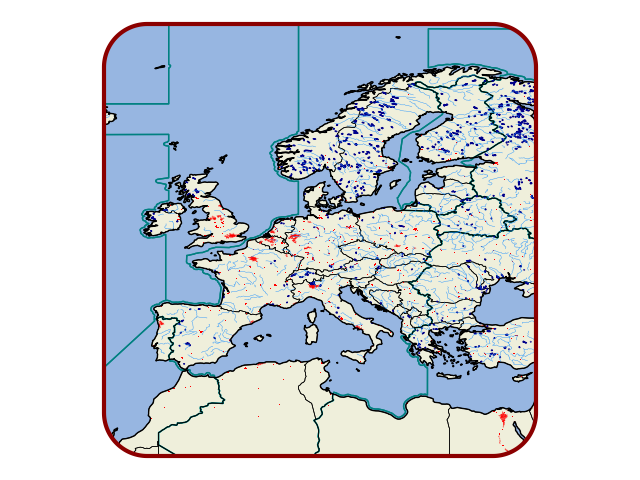

In [6]:
m.add_feature.cultural.time_zones(fc="none", ec="teal")
m.add_feature.cultural.admin_0_countries(fc="none", ec="k", lw=0.5)
m.add_feature.cultural.urban_areas_landscan(fc="r", ec="none")
m.add_feature.physical.lakes_europe(fc="b", ec="darkblue")
m.add_feature.physical.rivers_europe(fc="none", ec="dodgerblue", lw=0.3)
m.show()

## Getting a hand on the data

For more advanced use-cases, it can be necessary to access the underlying datasets.

:::{tip}
With EOmaps, you can quickly load the data of a selected feature as a `geopandas.GeoDataFrame` with:
```python
gdf = m.add_feature.cultural.<FEATURE-NAME>.get_gdf()
```
:::

In [7]:
from eomaps import Maps
m = Maps(facecolor="none")
m.set_frame(rounded=0.3)
m.add_feature.preset("coastline", "ocean", "land", alpha=0.5)

In [8]:
places = m.add_feature.cultural.populated_places.get_gdf(scale=110)

This will load the corresponding NaturalEarth dataset of the feature, containing the geometries and all associated metadata. 

For example, the first 10 rows of the `places` GeoDataFrame look like this:

In [9]:
from IPython.display import display, HTML
style = places[:10].style.set_table_styles([dict(selector="tr", props=[("font-size", "8pt")])])

display(
    HTML(
        "<div style='width: 100%; height: 40ex; overflow: auto'>" +
        style.to_html() +
        "</div>"
    )
)

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,8,10,3,Admin-0 capital,Vatican City,nan,nan,Vatican City,1,nan,1,0,Vatican,VAT,Vatican,VAT,Lazio,VA,nan,41.903282,12.453387,832,832,562430,2,2,nan,Vatican City,636762,636762,0,0,0,20,177,177,68,68,160,160,99,99,12.333333,12.333333,12.481009,12.481009,41.766667,41.766667,42.050000,42.050000,12.419907,41.903477,Europe/Vatican,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.000000,Q237,101914185,0,Vatican City,Vatikanstadt,Ciudad del Vaticano,Cité du Vatican,Vaticano,Ватикан,梵蒂冈,nan,الفاتيكان,ভ্যাটিকান সিটি,Βατικανό,वैटिकन नगर,Vatikán,Vatikan,Città del Vaticano,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,1159127243,واتیکان,קריית הוותיקן,Ватикан,ویٹیکن سٹی,梵蒂岡,6691831,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (12.4533865 41.9032822)
1,7,20,0,Admin-0 capital,San Marino,nan,nan,San Marino,1,nan,0,0,San Marino,SMR,San Marino,SMR,nan,SM,nan,43.936096,12.441770,29579,29000,0,7,7,nan,San Marino,29088,29579,0,0,0,20,30,30,11,11,63,63,39,39,12.391667,12.391667,12.541667,12.541667,43.900000,43.900000,44.000000,44.000000,12.462153,43.953472,Europe/San_Marino,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.100000,Q1848,101837381,0,San Marino,San Marino,San Marino,Saint-Marin,San Marino,Сан-Марино,圣马力诺,nan,مدينة سان مارينو,সান মারিনো,Άγιος Μαρίνος,सैन मारिनो नगर,San Marino,San Marino,Città di San Marino,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,1159146051,سن مارینو,סן מרינו,Сан-Марино,سان مارینو شہر,聖馬力諾,3168070,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (12.4417702 43.9360958)
2,7,20,0,Admin-0 capital,Vaduz,nan,nan,Vaduz,1,nan,0,0,Liechtenstein,LIE,Liechtenstein,LIE,nan,LI,nan,47.133724,9.516670,36281,5342,33009,7,5,nan,Vaduz,45442,45442,0,0,0,20,45,45,17,17,90,90,56,56,9.433333,9.433333,9.558333,9.558333,47.091667,47.091667,47.233333,47.233333,9.503734,47.167478,Europe/Vaduz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.700000,Q1844,101828603,0,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,Вадуц,瓦都兹,nan,فادوتس,ফাডুৎস,Βαντούζ,वादुज़,Vaduz,Vaduz,Vaduz,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,1159146061,فادوتس,ואדוץ,Вадуц,واڈوز,華杜茲,3042030,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,POINT (9.5166695 47.1337238)
3,6,30,8,Admin-0 capital alt,Lobamba,nan,nan,Lobamba,0,Legislative and,0,0,eSwatini,SWZ,eSwatini,SWZ,Manzini,SZ,nan,-26.466668,31.199997,9782,4557,0,5,4,nan,Lobamba,9782,9782,9782,0,0,50,18,18,7,7,32,32,20,20,31.183333,31.183333,31.233333,31.233333,-26.458333,-26.458333,-26.391667,-26.391667,31.201993,-26.430254,Afri

You can then modify the obtained `GeoDataFrame` as you need and finally add it to the map with [`Maps.add_gdf`](eomaps.Maps.add_gdf)

In [10]:
m.add_gdf(places, markersize=places.NATSCALE/10, column="NATSCALE", ec="k")

<Figure size 640x480 with 0 Axes>

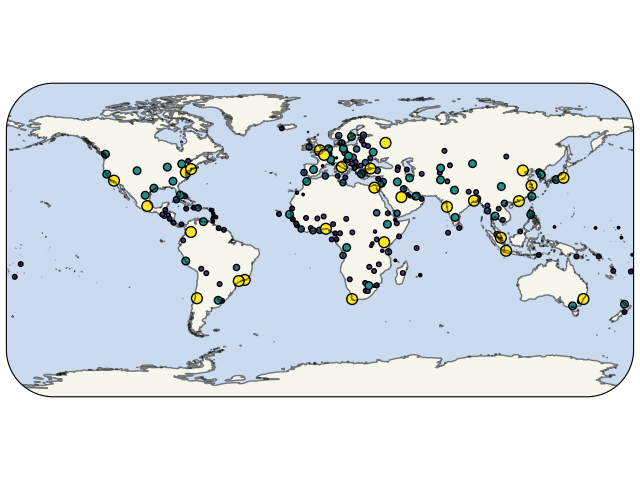

In [11]:
m.show()